# Part I - ProsperLoanData
## by Mary Maingi

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.In analyzing this dataset,i will be answering the following questions.

What factors affect a loan’s outcome status?

What affects the borrower’s APR or interest rate?

Are there differences between loans depending on how large the original loan amount was? 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.shape

(113937, 81)

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

### What is the structure of your dataset?

The dataset has 113,937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

factors that affect loan outcome status

Factors that affect the borrower’s APR or interest rate

differences between loans depending on how large the original loan amount was

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

loan status        Prosper rating

borrower's APR

loan original amount

Employment Status

In [8]:
feat=['LoanStatus','BorrowerAPR','BorrowerRate','LoanOriginalAmount','EmploymentStatus','ProsperScore',
      'ProsperRating (Alpha)','DebtToIncomeRatio','Term']

In [9]:
df['DebtToIncomeRatio'].fillna((df['DebtToIncomeRatio'].mean()), inplace=True)

In [10]:
df['BorrowerAPR'].fillna((df['BorrowerAPR'].median()), inplace=True)

In [11]:
df['ProsperScore'].fillna((df['ProsperScore'].median()), inplace=True)

In [12]:
df.dropna(subset=['EmploymentStatus'], inplace=True)

In [13]:
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

## Univariate Exploration


**In Univariate, I will look at visualizations of Individual Variables**

In [14]:
df.Term.value_counts()

36    85523
60    24545
12     1614
Name: Term, dtype: int64

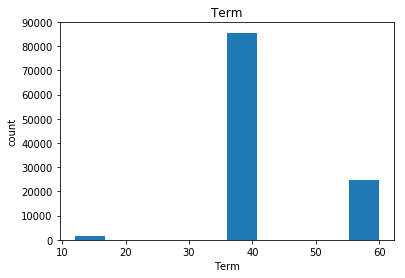

In [15]:
plt.hist(data=df,x='Term')
plt.title('Term')
plt.xlabel('Term')
plt.ylabel('count')
plt.show()

In this graph,the Term bar is approximately 35 for the loan amount.

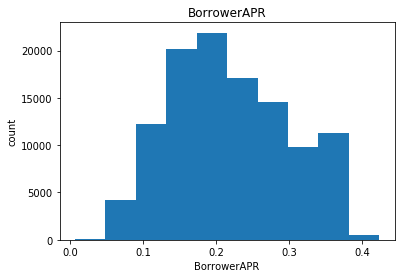

In [16]:
plt.hist(data=df, x='BorrowerAPR')
plt.title('BorrowerAPR')
plt.xlabel('BorrowerAPR')
plt.ylabel('count')
plt.show()

BorrowerAPR has a muiltmodal distribution of values with the highest peak being at 0.2.

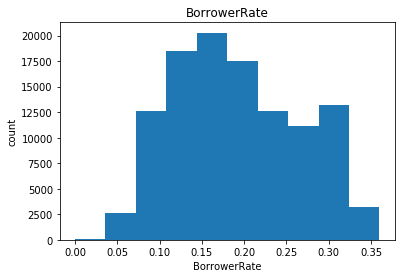

In [17]:
plt.hist(data=df, x='BorrowerRate')
plt.title('BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('count')
plt.show()

BorrowerRate has a muiltmodal distribution of values with the highest peak at 0.15.

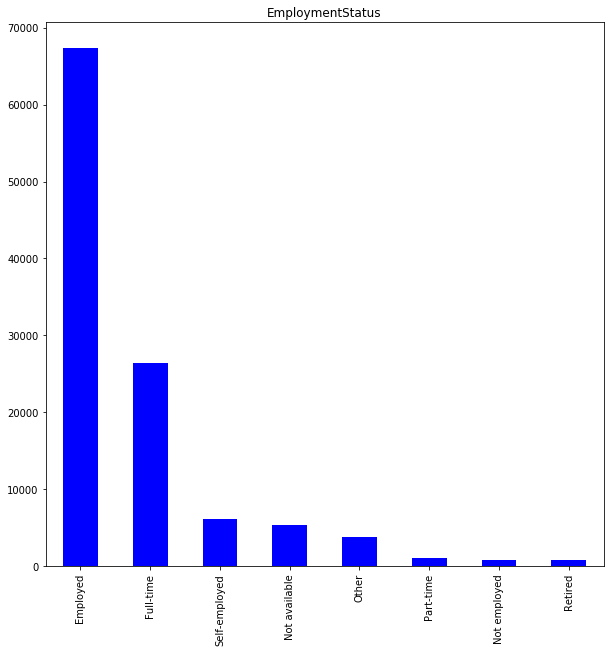

In [18]:
plt.figure(figsize=[10,10])
df['EmploymentStatus'].value_counts().plot(kind='bar', color='blue', title='EmploymentStatus')

The Employment status graph is skewed to the left. The highest bar represents the employed category followed by full-time and the lowest bar has the retied category.

(0, 1)

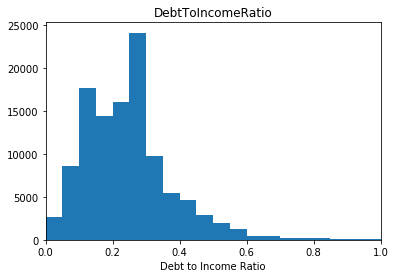

In [19]:
binsize = 0.05
bins = np.arange(0, df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.title('DebtToIncomeRatio')
plt.xlim(0,1)

The highest peak for the debt to income ratio graph is at 0.3. 

Text(0,0.5,'count')

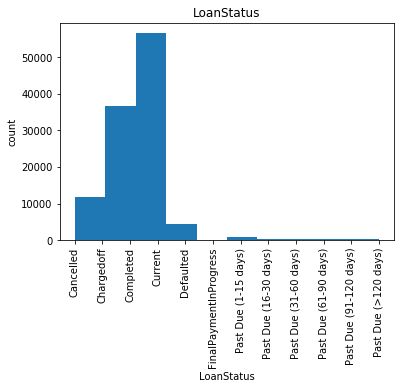

In [20]:
plt.hist(data=df, x='LoanStatus')
plt.xticks(rotation=90)
plt.title('LoanStatus')
plt.xlabel('LoanStatus')
plt.ylabel('count')

The loan Status graph has the highest bar representhing the current, followed by completed and the lowest is the past dues.

In [21]:
Loan_order=['1000','5000','10000','15000','20000','20000','25000','30000','35000']

Text(0,0.5,'count')

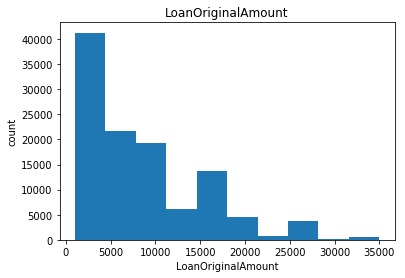

In [22]:
plt.hist(data=df, x='LoanOriginalAmount')
plt.title('LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('count')

The loan original mount has the highest bars representing less than 10,000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The BorrowerRate and BorrowerAPR are muiltmodal distribution of values with the highest peaks being at 0.15 and 0.2 respectively.

The debt to income ratio has its peak at 0.3 for the loan amount.This debt to income for the amount is very high and from this most individauals debt to income ration is at this 0.3.

The current and completed loan status are  the highest and this shows a good status for the prosper loans.

The employment status has most people being employed and this is good because when one is employed, they will be able to pay the loan.

The loan original amount shows that most people who apply prosper loans have their loan range that is below 10,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are variables like Debt to income ratio which had missing values and had to be filled up.

There are variables like prosper rating(alpha) whoe data type was  changed to an ordered one.

The employment status variable, I chose to work with the rows which had values.

## Bivariate Exploration

**What is the relationship between BorrowerRate and Debt to income ratio**

Text(0.5,1,'BorrowerRate and DebtToIncomeRatio')

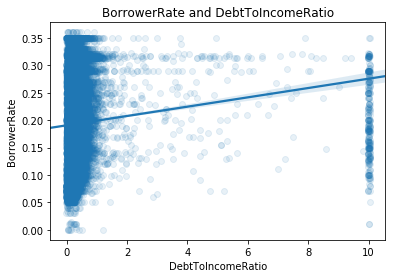

In [23]:
sb.regplot(data=df,x='DebtToIncomeRatio', y='BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.title('BorrowerRate and DebtToIncomeRatio')

The debt to income ratio and borrowerrate graph shows that as the rate increases the debt to income ratio decreases upto some point. 

**Relationship between loan original amount and term**

Text(0.5,1,'LoanOriginalAmount versus Term')

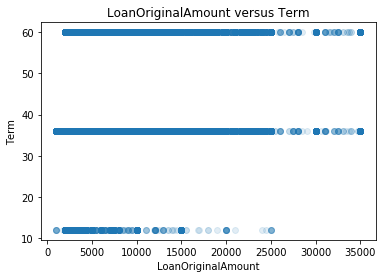

In [24]:
plt.scatter(data = df, x='LoanOriginalAmount', y = 'Term', alpha=1/8);
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Term')
plt.title('LoanOriginalAmount versus Term')

This graph of loan original amount and the term shows that as the loan amount increases the term for the loan also increases hence there is a positive correlation between the two.

**Relationship between Term and properscore**

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

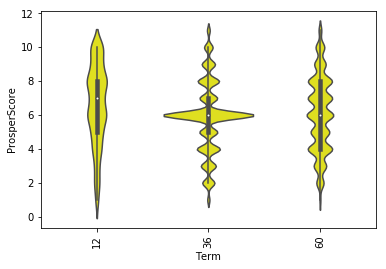

In [25]:
sb.violinplot(data=df, x='Term', y='ProsperScore',color='yellow')
plt.xticks(rotation=90)

There is a positive correlation between prosper score and the term as it shows that as the prosper score increases the loan term also  increases.

**Relationship between Loan original amount and borrowerapr**

Text(0.5,1,'LoanOriginalAmount versus BorrowerAPR')

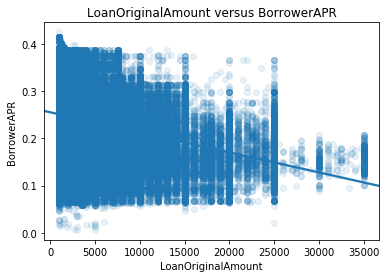

In [26]:
sb.regplot(data=df,x='LoanOriginalAmount', y='BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
plt.title('LoanOriginalAmount versus BorrowerAPR')

The borrowerapr is high at some point but decreases as the loan amount increases. This shows that there is a negative correlation between borrowerapr and loan amount.

**Relationship between Loan status and debt to income ratio**

Text(0.5,1,'LoanStatus versus DebtToIncomeRatio')

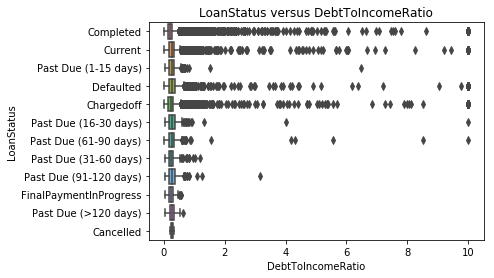

In [27]:
sb.boxplot(data=df, x='DebtToIncomeRatio', y='LoanStatus')
plt.title('LoanStatus versus DebtToIncomeRatio')


In this graph current,completed and charged off have high debt to income ratio while cancelled has the minimum debt ratio.

**Relationship between Loan original amount and prosper rating(alpha)**

Text(0.5,1,'LoanOriginalAmount versus ProsperRating (Alpha)')

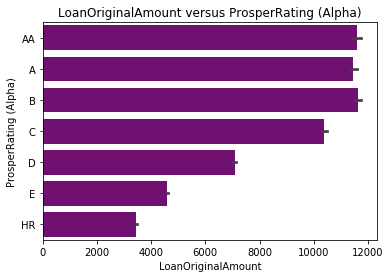

In [28]:
sb.barplot(data=df, x='LoanOriginalAmount', y='ProsperRating (Alpha)', color='purple')
plt.title('LoanOriginalAmount versus ProsperRating (Alpha)')

In this graph of loan original amount and prosper rating(alpha), it shows that rating 'C' has the largest loan amount followed by 'AA and A'.This are good ratings on the loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower apr and the loan original amount have a negative correlation, in that as the loan amount increases the borrowerapr decreases, though at some point of the laon amount its high.

The borrower rate and debt to income ratio are negatively correlated because as the rate increases the debt to income ratio decreases.

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

The loan amount and the rating are positively correlated because we see good ratings when the amount increases(AA,A,C).

The prosperscore an the term are positively correlated because as the prosper score increases the term also increases.

## Multivariate Exploration

In [29]:
numeric_vars=['LoanOriginalAmount','ProsperScore','DebtToIncomeRatio','StatedMonthlyIncome', 'BorrowerRate']

In [30]:
categ_var=['Occupation','EmploymentStatus','ProsperRating (Alpha)','LoanStatus']

**Effects of some categorical variables on numerical variables**

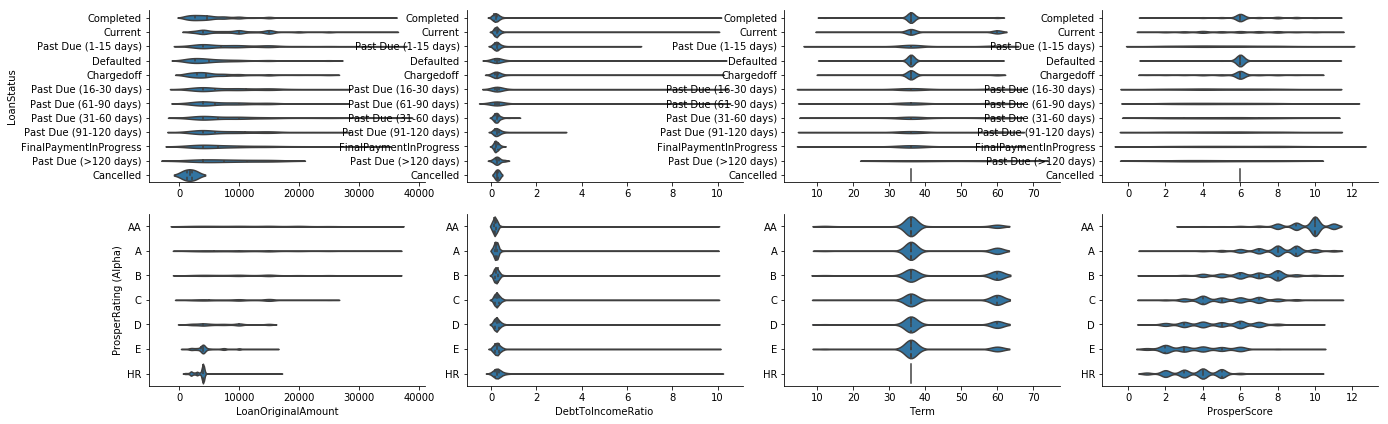

In [31]:
plt.figure(figsize=[10,10])
g = sb.PairGrid(data = df, x_vars = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'Term','ProsperScore'],
                y_vars = ['LoanStatus','ProsperRating (Alpha)'],
               size=3, aspect=1.5);
g.map(sb.violinplot, inner = 'quartile')

There is a positive correlation between loan amount, prosperscore and the rating. when the loan amount and prosper score increase the rating is good. The other variables don't seem to have a strong correlation.

**Effect of prosper rating on loan original amount and borrowerapr**

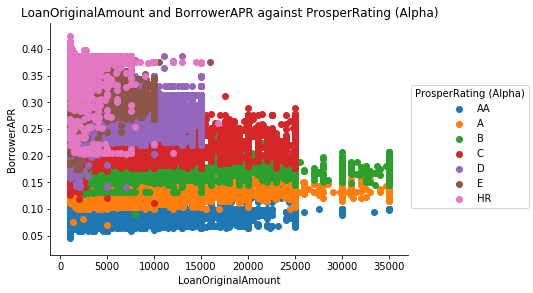

In [33]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', size = 4, aspect=1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
plt.title('LoanOriginalAmount and BorrowerAPR against ProsperRating (Alpha)')
g.add_legend()

This graph of Loan amount against borrowerapr by prosper rating shows good ratings are seen when there is increase in loan amount and a small increase in borrower apr. The borrower apr increases with ratings from AA,A to B.

**Effect of prosper rating on debt to income ratio and borrower rate**

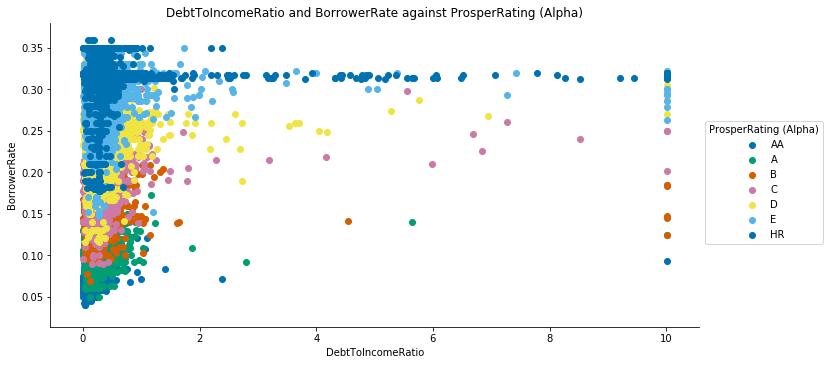

In [34]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', size = 5, aspect=2.0,
                 palette = 'colorblind')
g.map(plt.scatter, 'DebtToIncomeRatio', 'BorrowerRate')
plt.title('DebtToIncomeRatio and BorrowerRate against ProsperRating (Alpha)')
g.add_legend()

This graph shows that as the borrower rate increases as the debt to income ratio decreases and this has a positive impact on the ratings as they move from bad(HR) to good rating(AA).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The prosper rating had an impact on the borrower rate and debt to income ratio because as the borrower rate increased the rating moved from  bad(HR) to a good rating(AA).

Good rating are also seen when the loan amount increases with a small increase in the borrower apr.

### Were there any interesting or surprising interactions between features?

When the borrower rate increases with decrease in debt to income ratio,the rating move from bad(HR) to good(AA). It's interesting that as the rate increases with decrease in debt to income ratio the rating also moves from good(A) to bad(E).It also moves from good(B) to bad(D).

## Conclusions
This exploration analysis looked at the factors that affect a loan’s outcome status,borrower’s APR or interest rate
and differences between loans depending on how large the original loan amount was.

It is evident that the features discussed above affect either positively or negatively the loan status, borrowerapr or interest rate.
